# 2. Distributed Methods

Contents
1. Word2vec
2. FastText
3. Glove
4. Visualization

## Prepare for the practice session

### The files uploaded to Colab

* `NanumBarunpenB.otf` : Font used to prevent text from being broken during visualization
* `wordsim_similarity_goldstandard.csv` : Word similarity test data
* `word_analogy_goldstandard.txt` : Semantic word analogy test data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [ ]:
# Import the necessary libraries
import gensim
from gensim.models import Word2Vec, FastText
from gensim.models import KeyedVectors
import pandas as pd

* Gensim Library - [What is Gensim?](https://radimrehurek.com/gensim/intro.html)
  * Gensim is a library that provides the necessary tools to represent text data as meaningful vectors.
  Through Gensim, you can use algorithms such as Word2Vec and FastText.

### Load Corpus Data

In [ ]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from nltk.corpus import movie_reviews

# Download the movie_reviews dataset from NLTK
nltk.download('movie_reviews')

# Fetch review texts as a list
reviews = [' '.join(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()]

# Enclose each review in double quotes and separate them with new lines
reviews_str = '\n'.join([f'"{review}"' for review in reviews])

# Save the transformed review strings to a text file
with open('movie_reviews.txt', 'w', encoding='utf-8') as f:
    f.write(reviews_str)

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [ ]:
path = '/content/movie_reviews.txt'

### 1) Word2Vec

* This is a word embedding model introduced by Google's research team in 2013, and it is one of the most widely used models.
* Two training methods of the Word2Vec model:
    * **CBOW Model**: Trained by predicting the target word using the context words.
    * **Skip-gram Model**: Trained by predicting the surrounding context words using the target word.
<img src="https://blog.kakaocdn.net/dn/Czgg5/btqEttXkz91/LK5RqukCujicrxQ2kRWt0k/img.png" height=300>
* [Gensim API Reference - Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html)

Skip-gram model이 CBOW 모델보다 더 나은 성능을 보임!

#### Training the Word2Vec Model

In [ ]:
# Convert the data into a suitable object to be used as input for the model
corpus = gensim.models.word2vec.Text8Corpus(path)

print(list(corpus)[0][:100])

['"plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch', 'the', 'movie', 'and', '"', 'sorta', '"', 'find', 'out', '.', '.', '.', 'critique', ':', 'a', 'mind', '-', 'fuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', ',', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', '.', 'which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to']


In [ ]:
# Train the Word2Vec model using the loaded data (corpus)
model = Word2Vec(sentences=corpus, window=3, min_count=5, sg=1)

* `sentences`: A list of word lists (a list of lists of tokens)
* `size`: The dimensionality of the embedding vectors
* `window`: The number of words (range) to look at before and after the target word for prediction, it controls the number of neighboring words considered as context, influencing how broad or narrow the context is.
* `min_count`: Determines the minimum frequency of words to be ignored, Setting min_count=0 means that all words, including very rare ones that appear only once or very few times, are considered during the training process. This will result in a larger vocabulary, but it may also introduce noise from infrequent words that don't provide enough context for meaningful learning, potentially affecting the model's performance. Additionally, it could increase memory usage and computational cost.
* `sg`: Training algorithm. 1 - Skip-gram, 0 - CBOW

#### Check the Word2Vec Embedding Results

In [ ]:
# Save the word vectors obtained from the trained model
word2vec_vectors = model.wv
word2vec_vectors.save("word2vec.wordvectors")

del model

In [ ]:
# Let's check the dense vector corresponding to 'bad'
word2vec_vectors['actor'] # A word present in the corpus

array([ 1.04639776e-01,  3.20789486e-01,  2.77364999e-01, -1.59501225e-01,
        1.57011703e-01, -5.23821533e-01,  5.29847264e-01,  4.75878060e-01,
        3.67816091e-01, -1.38480023e-01,  4.57855582e-01, -4.96699095e-01,
       -1.52536809e-01, -8.81227292e-03, -3.70123118e-01,  2.30875373e-01,
       -3.76150161e-01, -3.44557106e-01,  2.81095747e-02, -3.56947839e-01,
        3.03246409e-01,  6.17126405e-01,  2.25307599e-01, -1.05099149e-01,
        3.22669446e-01,  4.27070916e-01, -1.18619293e-01,  2.89449394e-01,
       -3.74711603e-01,  1.27691224e-01,  1.91373959e-01,  3.45889675e-05,
       -6.20009042e-02, -4.41185981e-01,  2.61012048e-01,  8.57267901e-02,
       -8.45285505e-02, -3.98524493e-01, -1.67569458e-01,  1.41536906e-01,
        8.81021917e-02, -1.72832996e-01, -2.52223164e-01, -4.46467027e-02,
        1.56286106e-01, -4.44865450e-02, -7.16783106e-01,  1.52061045e-01,
        5.21703158e-03,  2.66749650e-01, -1.97549179e-01, -4.99952614e-01,
        3.19750607e-01, -

#### Evaluating Word2Vec Embeddings

In [ ]:
# Load the previously saved word vectors
word2vec_vectors = KeyedVectors.load("word2vec.wordvectors")

##### Output the Most Similar Words

In [ ]:
# Print the 10 most similar words to 'bad'
word2vec_vectors.most_similar('actor', topn=10)

[('actress', 0.8326610326766968),
 ('performer', 0.7380046248435974),
 ('nomination', 0.7106876373291016),
 ('underrated', 0.709235668182373),
 ('villain', 0.7074275016784668),
 ('award', 0.7005232572555542),
 ('branagh', 0.688382089138031),
 ('hack', 0.6876884698867798),
 ('performance', 0.6775097846984863),
 ('starred', 0.676101565361023)]

In [ ]:
# An error occurs if the word does not exist in the corpus
word2vec_vectors.most_similar('hanyang', topn=10)

KeyError: "Key 'hanyang' not present in vocabulary"

##### Calculate Similarity Between Two Words

In [ ]:
# Similarity between 'bad' and 'hockey'
word2vec_vectors.similarity('bad', 'actor')

0.3026984

In [ ]:
# Similarity between 'good' and 'hockey'
word2vec_vectors.similarity('good', 'actor')

0.3079496

##### Print the Least Similar Words

In [ ]:
# Print the word that is least similar among 'comedy', 'drama', and 'thriller'
word2vec_vectors.doesnt_match(['comedy', 'drama', 'thriller'])

'thriller'

##### Operations on Word Vectors

In [ ]:
# actress + female - male = ???
word2vec_vectors.most_similar(positive=['actress', 'female'], negative=['male'], topn=5)

[('actor', 0.7779780626296997),
 ('role', 0.686089277267456),
 ('performer', 0.6860692501068115),
 ('villain', 0.6727011799812317),
 ('performance', 0.6690705418586731)]

### 2) FastText

* A word embedding technique developed and released by Facebook.
* It is fundamentally similar to word2vec, but represents each word as character (character-level) n-grams.
* FastText considers that multiple words exist within a single word and learns by taking internal words, or subwords, into account.
* It has the advantage of being able to handle unknown words (Out Of Vocabulary) that are not in the corpus.
* [Gensim API Reference - FastText](https://radimrehurek.com/gensim/models/fasttext.html)

#### Training the FastText Model

In [ ]:
# Train the FastText model using the loaded data (corpus)
model = FastText(sentences=corpus, window=3, min_count=5, sg=1)

* `sentences`: A list of word lists (a list of lists of tokens)
* `size`: The dimensionality of the embedding vectors
* `window`: The number of characters (range) to look at before and after the target word for prediction
* `min_count`: Determines the minimum frequency of words to be ignored
* `sg`: Training algorithm. 1 - Skip-gram, 0 - CBOW

#### Check the FastText Embedding Results

In [ ]:
# Save the word vectors obtained from the trained model
FastText_vectors = model.wv
FastText_vectors.save("fasttext.wordvectors")

del model

In [ ]:
# Let's check the dense vector corresponding to 'actor'
FastText_vectors['actor']

array([ 0.14358234, -0.36843857, -0.17172605,  0.01419163,  0.15939146,
       -0.2387865 , -0.17905697,  0.36745217, -0.10697289, -0.43821412,
        0.80114555,  0.76299953, -0.15410158,  0.4380142 , -0.25155845,
        0.2996808 , -0.01847725, -0.4551241 , -1.1776811 , -0.24750134,
       -0.3714933 ,  0.2041506 ,  0.3178073 ,  0.6167316 , -0.2536992 ,
        0.47746518, -0.13384248,  0.08260087, -0.05155457, -0.48322162,
       -0.04021553, -0.08438317,  0.19332463, -0.26763642, -0.21825768,
        0.00280373,  0.49475303, -0.31611603, -0.28603315,  0.71528584,
        0.07102443,  0.05242927, -0.7190468 ,  0.81137574,  0.34659967,
       -0.23372342, -0.00280676, -0.42578375,  0.24243242, -0.02583713,
        0.18438539, -0.2347617 ,  0.11807779,  0.22606884, -0.01523081,
        0.0303198 , -0.37656853, -0.36793995,  0.14343742,  0.86548615,
        0.319943  , -0.56832033, -0.5562436 , -0.00368034, -0.11893752,
        0.13191897, -0.14808531,  0.56584257,  0.20365806, -0.02

#### Evaluating FastText Embeddings

In [ ]:
# Load the previously saved word vectors
FastText_vectors = KeyedVectors.load("fasttext.wordvectors")

##### Output the Most Similar Words

In [ ]:
FastText_vectors.most_similar('actor', topn=10)

[('factor', 0.8721573352813721),
 ('actress', 0.8698425889015198),
 ('benefactor', 0.8314971923828125),
 ('performer', 0.797081470489502),
 ('hector', 0.7955628633499146),
 ('actresses', 0.7671880125999451),
 ('inspector', 0.7478336095809937),
 ('"director', 0.7393988370895386),
 ('actors', 0.739179253578186),
 ('performance', 0.7387716174125671)]

In [ ]:
# Similarity can be calculated even for words not present in the corpus
FastText_vectors.most_similar('hanyang', topn=10) # Word2Vec과는 다르게, 안 나온 단어도 유사도 측정 가능!

[('hanako', 0.9130401611328125),
 ('zhang', 0.9119471907615662),
 ('shang', 0.8985806107521057),
 ('tiffany', 0.8976544737815857),
 ('hamlet', 0.8961241245269775),
 ('haze', 0.8877438306808472),
 ('handheld', 0.8816292881965637),
 ('hang', 0.880558967590332),
 ('hazy', 0.8802452683448792),
 ('yang', 0.880027174949646)]

##### Similarity Analysis Between Two Words

In [ ]:
FastText_vectors.similarity('bad', 'actor')

0.3546836

In [ ]:
FastText_vectors.similarity('good', 'actor')

0.3532628

### 3) GloVe
* A word embedding technique developed by a research team at Stanford University.
* It is designed to reflect global statistical information, rather than just learning local context within a window, while still providing good performance in similarity calculations.
* It uses a word-context matrix (co-occurrence matrix).

  * "What do you want to eat today?"
  * "I want to eat salmon today."
  * "I ate salmon yesterday."

| Count | Today | What | Eat | Want | I | Salmon | Yesterday | Ate |
|-------|-------|------|-----|------|---|--------|-----------|-----|
| Today | 0     | 1    | 0   | 0    | 1 | 1      | 0         | 0   |
| What  | 1     | 0    | 1   | 0    | 0 | 0      | 0         | 0   |
| Eat   | 0     | 1    | 0   | 2    | 0 | 1      | 0         | 0   |
| Want  | 0     | 0    | 2   | 0    | 0 | 0      | 0         | 0   |
| I     | 1     | 0    | 0   | 0    | 0 | 0      | 1         | 0   |
| Salmon | 1    | 0    | 1   | 0    | 0 | 0      | 1         | 1   |
| Yesterday | 0 | 0    | 0   | 0    | 1 | 1      | 0         | 0   |
| Ate   | 0     | 0    | 0   | 0    | 0 | 1      | 0         | 0   |

* [GloVe Python GitHub](https://github.com/maciejkula/glove-python)

In [ ]:
!pip install glove-python3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.0/327.0 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for glove-python3: filename=glove_python3-0.1.0-cp310-cp310-linux_x86_64.whl size=1065523 sha256=3ee59ca8733dbcb8954c1a36b385ffac9758f415dcd146cff7650635845b5caa
  Stored in directory: /root/.cache/pip/wheels/fe/2f/79/34314d44a0907e90e323c8c182ec23f126eb460829e02d98cf
Successfully built glove-python3


In [ ]:
# Import the libraries
from glove import Glove, Corpus

#### Create Word-Context Matrix

In [ ]:
# Declare the corpus object
data = gensim.models.word2vec.Text8Corpus(path)
corpus = Corpus()

In [ ]:
# Create the vocabulary dictionary and co-occurrence matrix (word-context matrix) for the corpus
corpus.fit(data, window=3)

# Output the size of the dictionary and the number of collocations
print('Dict size : %s' % len(corpus.dictionary))
print('Collocations: %s' % corpus.matrix.nnz)       # nnz: non-zero elements

# Save the corpus as 'corpus.model'
corpus.save('corpus.model')

Dict size : 40392
Collocations: 1467222


#### Training the GloVe Model

In [ ]:
# Declare the GloVe model
glove = Glove(no_components=100, learning_rate=0.05)

# Train the GloVe model
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)

Performing 20 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


* `no_components`: The dimensionality of the embedding vectors
* `learning_rate`: The learning rate - the step size used when updating the model
* `epoch`: The number of times the learning process is repeated

In [ ]:
# To use the GloVe model, the vocabulary dictionary must be added to the model
glove.add_dictionary(corpus.dictionary)

# Save the model
glove.save('glove.model')

#### Evaluating the GloVe Model

In [ ]:
glove = Glove.load('glove.model')
glove.most_similar('actor', number=10)

[('actress', 0.9244800175627513),
 ('older', 0.8634588698345612),
 ('artist', 0.7905071868264576),
 ('adult', 0.7858430881792372),
 ('woman', 0.7828901812670481),
 ('man', 0.7746755026159758),
 ('an', 0.7702042801519785),
 ('character', 0.7683887810306458),
 ('doctor', 0.7655475529037007)]

## Part 2 Visualization

* Visualize the word2vec embedding results.
* Since the embedding vectors are 100-dimensional, we need to reduce them to a lower dimension (2D or 3D) that we can understand for visualization.
* t-SNE (t-distributed Stochastic Neighbor Embedding)
  * A methodology to preserve the distances between words as much as possible during dimensionality reduction.
  * It iteratively adjusts the vector space to minimize the difference between the probability distribution of the data in the original space and that in the reduced space.

* [Reference for t-SNE Concept and Usage](https://gaussian37.github.io/ml-concept-t_sne/)

In [ ]:
import nltk
import pandas as pd
from nltk.corpus import movie_reviews

# Download the movie_reviews dataset from NLTK
nltk.download('movie_reviews')

# Get the file IDs and the corresponding categories (positive/negative labels)
fileids = movie_reviews.fileids()
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids]

# Retrieve the text of each review by joining the words into a single string
reviews = [' '.join(movie_reviews.words(fileid)) for fileid in fileids]

# Convert the reviews and categories into a pandas DataFrame
df = pd.DataFrame({
    'review': reviews,
    'category': categories
})

# Access and print the first review and its label
print(df.iloc[0]['review'])
print(df.iloc[0]['category'])

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


plot : two teen couples go to a church party , drink and then drive . they get into an accident . one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . what ' s the deal ? watch the movie and " sorta " find out . . . critique : a mind - fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn ' t snag this one correctly . they seem to have taken this pretty neat concept , but executed it terribly . so what are the problems with the movie ? well , its main problem is that it ' s simply too jumbled . it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no idea

In [ ]:
df.head()

,review,category
0,"plot : two teen couples go to a church party ,...",neg
1,the happy bastard ' s quick movie review damn ...,neg
2,it is movies like these that make a jaded movi...,neg
3,""" quest for camelot "" is warner bros . ' first...",neg
4,synopsis : a mentally unstable man undergoing ...,neg


In [ ]:
import re
import nltk
from nltk import word_tokenize
nltk.download('punkt')
from collections import Counter

from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Handle the issue of broken minus signs in the graph fonts
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources if necessary
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define filters for special characters
FILTERS = "([~,!?\"':.;|~)^(])"  # Special characters to filter out
CHANGE_FILTER = re.compile(FILTERS)

# Define filter for numbers and dashes
EXP = "[1234567890\-]"  # Numbers and dashes to filter out
CHANGE_EXP = re.compile(EXP)

# Define filter to keep only English letters and spaces
ENG = "[^a-zA-Z\s]"  # Keep only letters and spaces
CHANGE_ENG = re.compile(ENG)

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocess the reviews
words = []
for line in df['review']:
    line = CHANGE_FILTER.sub("", line)  # Remove special characters
    line = CHANGE_EXP.sub("", line)     # Remove numbers and dashes
    line = CHANGE_ENG.sub("", line)     # Remove everything that's not a letter or space
    line = line.strip()                  # Remove leading and trailing spaces
    if line:                             # Check if the line is not empty
        token = word_tokenize(line)      # Tokenize the cleaned line
        # Lemmatize and remove stopwords
        token = [lemmatizer.lemmatize(word.lower()) for word in token if word.lower() not in stop_words]
        words += token                   # Add tokens to the list

# Output the processed words
print(words)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Load the word2vec embedding results
word2vec_wordvectors = KeyedVectors.load('word2vec.wordvectors')

# Extract the 800 most frequent words
freq_list = Counter(words).most_common(800)
vocab = [i[0] for i in freq_list if len(i[0]) > 1]

# Filter for words that exist in the Word2Vec model
filtered_vocab = [word for word in vocab if word in word2vec_wordvectors.key_to_index]

# Embedding vectors corresponding to the filtered words
X = word2vec_wordvectors[filtered_vocab]

### t-SNE 2D Dimensionality Reduction

In [ ]:
# Create a t-SNE model to reduce to 2 dimensions
tsne_2d_model = TSNE(perplexity=15, n_components=2, max_iter=3600, random_state=0)

* `perplexity`: Controls the number of points that influence the learning process.

    Typically, values between 5 and 50 are used, and smaller values focus more on the local structure than the global structure.
* `n_components`: The dimensionality of the embedding space.
* `n_iter`: The maximum number of iterations for optimization. It should be at least 250.
* `random_state`: Sets the seed for the random number generation algorithm.  
* For more detailed explanations of the parameters, refer to [this link](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).

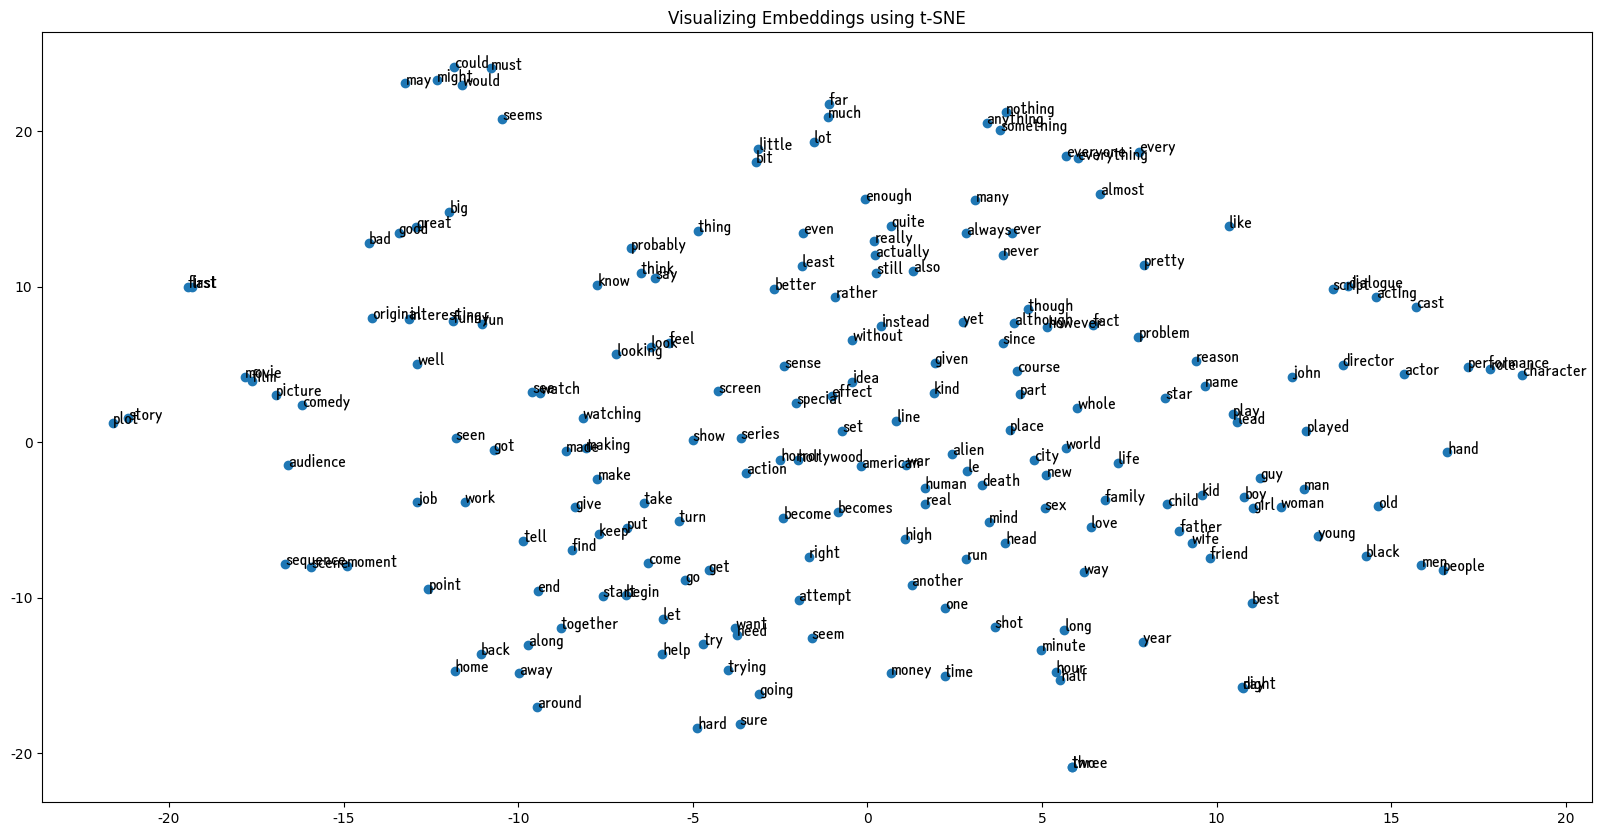

In [ ]:
from matplotlib import font_manager

# Define font properties
prop = font_manager.FontProperties(fname='/content/drive/MyDrive/Unstructured Data Analysis - Code Practice/[Week 6] Text Representation/data/NanumBarunpenB.otf')  # Path to the desired font file

def tsne_2d(title, tsne, X):
    # Reduce the embedding results from 100 dimensions to 2 dimensions
    X_tsne = tsne.fit_transform(X[:200,:])
    # Save the x and y coordinates for each word in a DataFrame
    df = pd.DataFrame(X_tsne, index=vocab[:200], columns=['x', 'y'])

    # Create and display the graph
    %matplotlib inline
    fig = plt.figure()              # Create the graph
    fig.set_size_inches(20, 10)     # Set graph size
    ax = fig.add_subplot(1, 1, 1)   # Create 2D axes
    ax.scatter(df["x"], df["y"])    # Mark points at each coordinate
    for word, pos in list(df.iterrows()):
        ax.annotate(word, pos, fontsize=12, fontproperties=prop) # Annotate words
    plt.title(title)                # Display title
    plt.show()                      # Output the graph

# tsne_2d_model must be defined
tsne_2d('Visualizing Embeddings using t-SNE', tsne_2d_model, X)

## 👀 [Reference] Word Embedding Test
* Quantitatively evaluate how well the grammatical and semantic relationships between words are captured in embeddings.

* Word similarity test
  * This method involves constructing a series of word pairs and calculating the correlation between human-evaluated scores and cosine similarity between word vectors to assess the quality of word embeddings.

* Word Analogy Evaluation
  * This evaluation tests whether answers to queries can be derived through calculations between word vectors.

In [ ]:
import seaborn as sns
import scipy.stats as st

### 1) Word Similarity Test

In [ ]:
# Returns the correlation between human-evaluated similarity scores of the evaluation data and the cosine similarity of the model's embedding vector pairs
def word_sim_test(test_fname, wordvectors):
        actual_sim_list, pred_sim_list = [], []
        missed = 0
        with open(test_fname, 'r') as pairs:
            for pair in pairs:
                w1, w2, actual_sim = pair.strip().split(",")
                try:
                    pred_sim = wordvectors.similarity(w1, w2)         # Cosine similarity between the model's embedding vector pairs
                    actual_sim_list.append(float(actual_sim))         # Human-evaluated similarity score
                    pred_sim_list.append(pred_sim)
                except KeyError:
                    missed += 1

        spearman, _ = st.spearmanr(actual_sim_list, pred_sim_list) # Spearman correlation coefficient
        pearson, _ = st.pearsonr(actual_sim_list, pred_sim_list)   # Pearson correlation coefficient
        return spearman, pearson, missed

In [ ]:
# This is the path to the test set.
test_fname = "/content/drive/MyDrive/Unstructured Data Analysis - Code Practice/[Week 6] Text Representation/data/wordsim_similarity_goldstandard.csv"

In [ ]:
# The Word2Vec and FastText embedding results (word vectors) learned previously are loaded here.
word2vec_wordvectors = KeyedVectors.load('word2vec.wordvectors')
fasttext_wordvectors = KeyedVectors.load('fasttext.wordvectors')

In [ ]:
# Perform word similarity evaluation for both models.
word2vec_test = word_sim_test(test_fname, word2vec_wordvectors)
fasttext_test = word_sim_test(test_fname, fasttext_wordvectors)

In [ ]:
# The closer the correlation coefficient is to 1, the stronger the correlation between the two.
# (spearman, pearson, missed)
print(word2vec_test)
print(fasttext_test)

(0.08113392130462532, 0.10528040766808315, 70)
(0.23000543713694696, 0.27103572723881125, 0)


In [ ]:
# The similarity evaluation results are output as a DataFrame.
df = pd.DataFrame({"Word Embedding": ["Word2Vec","Word2Vec","FastText","FastText"]})
df["Criterion"] = ["spearman", "pearson"]*2
df["score"] = list(word2vec_test[:-1] + fasttext_test[:-1])
df

,Word Embedding,Criterion,score
0,Word2Vec,spearman,0.081134
1,Word2Vec,pearson,0.105280
2,FastText,spearman,0.230005
3,FastText,pearson,0.271036


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'Word Similarity Test Result')

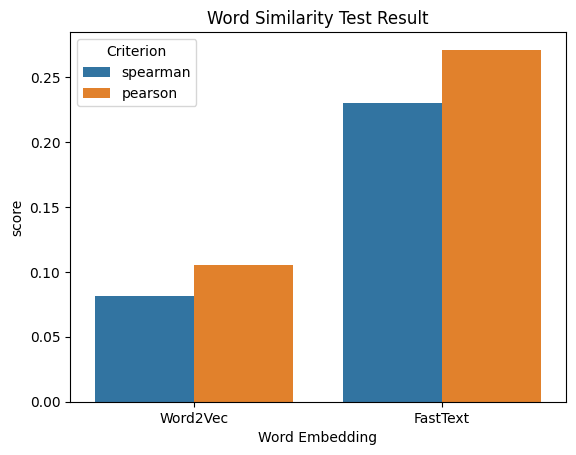

In [ ]:
# The similarity evaluation results are output as a bar plot.
sns.barplot(x="Word Embedding", y="score", hue="Criterion", data=df)
plt.title("Word Similarity Test Result")

### 2) Word Analogy Test

In [ ]:
# This function evaluates whether the result of vector arithmetic can deduce the correct answer in semantic analogy.
def word_analogy_test(test_fname, wordvectors):
        correct, total, missed = 0, 0, 0

        with open(test_fname, 'r', encoding='utf-8') as f:
            for line in f:
                if line.startswith("#") or len(line) <= 1: continue
                words = line.strip().split(" ")

                try:
                    predicted_answer = [i[0] for i in wordvectors.most_similar(positive=[words[0], words[2]], negative= [words[1]], topn=30)]
                    # print(words[0] + " - " + words[1] + " + " + words[2])
                    # print("correct answer:", words[3])
                    # print("predicted answers:", predicted_answer[0])
                    # print("")
                    if words[-1] in predicted_answer: correct += 1
                except:
                    missed += 1

                total += 1
        print(wordvectors)
        print("# of correct answer:", correct, ", # of data:", total, ", # of errors:", missed)
        print()
        return correct/(total-missed) # Correct count / Processed data count

In [ ]:
test_fname = "/content/drive/MyDrive/Unstructured Data Analysis - Code Practice/[Week 6] Text Representation/data/word_analogy_goldstandard.txt"

In [ ]:
# Perform word analogy evaluation for both models.
word2vec_test = word_analogy_test(test_fname, word2vec_wordvectors)
fasttext_test = word_analogy_test(test_fname, fasttext_wordvectors)

KeyedVectors<vector_size=100, 14848 keys>
# of correct answer: 171 , # of data: 19558 , # of errors: 13089

FastTextKeyedVectors<vector_size=100, 14848 keys>
# of correct answer: 1122 , # of data: 19558 , # of errors: 14



In [ ]:
# The analogy evaluation results are displayed as a DataFrame.
df2 = pd.DataFrame({"Word Embedding": ["Word2Vec","FastText"]})
df2["score"] = [word2vec_test, fasttext_test]
df2

,Word Embedding,score
0,Word2Vec,0.026434
1,FastText,0.057409


Text(0.5, 1.0, 'Word Analogy Test Result')

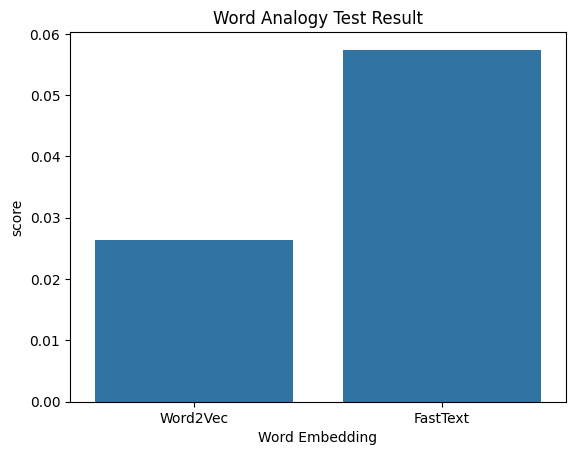

In [ ]:
# The analogy evaluation results are output as a bar plot.
sns.barplot(x="Word Embedding", y="score", data=df2)
plt.title("Word Analogy Test Result")